In [1]:
#This section will deal with importing the data from the .json files and processing it into pandas dataframes

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.naive_bayes import MultinomialNB
import string

# open input file: 
reviewFile = open('review.json', encoding="utf8")
businessFile = open('business.json', encoding="utf8")
userFile = open('user.json', encoding="utf8")

# read the first 1 million entries
# set to -1 to process everything
stop = 50000

allDataReview= list()
for i, line in enumerate(reviewFile):
    if i==stop:
        break    
    # converting the json into a dictionary
    data = json.loads(line)
    # extraction of the data we want
    business_id = data['business_id']
    user_id = data['user_id']
    text = data['text']
    stars = data['stars']
    # adding data that we've collected
    allDataReview.append([business_id, user_id, stars, text])

allBusinessReview = list()
for i, line in enumerate(businessFile):
    if i==stop:
        break
    
    data = json.loads(line)
    
    business_id = data['business_id']
    name = data['name']
    city = data['city']
    state = data['state']
    stars = data['stars']
    categories = data['categories']   
    review_count = data['review_count']

    allBusinessReview.append([business_id, name, city, state, stars, categories, review_count])
    
allUserReview = list()
for i, line in enumerate(userFile):
    if i==stop:
        break
    
    data = json.loads(line)
    
    user_id = data['user_id']
    review_count = data['review_count']
    
    allUserReview.append([user_id, review_count])
    
# create the DataFrame
dfReview = pd.DataFrame(allDataReview, columns=['business_id', 'user_id', 'stars','text'])
dfBusiness = pd.DataFrame(allBusinessReview, columns=['business_id','name', 'city', 'state', 'stars', 'categories','review_count'])
dfUser = pd.DataFrame(allUserReview, columns=['user_id', 'review_count'])
print(dfReview)
print(dfBusiness)
print(dfUser)


reviewFile.close()
businessFile.close()
userFile.close()

                  business_id                 user_id  stars  \
0      ujmEBvifdJM6h6RLv4wQIg  hG7b0MtEbXx5QzbzE6C_VA    1.0   
1      NZnhc2sEQy3RmzKTZnqtwQ  yXQM5uF2jS6es16SJzNHfg    5.0   
2      WTqjgwHlXbSFevF32_DJVw  n6-Gk65cPZL6Uz8qRm3NYw    5.0   
3      ikCg8xy5JIg_NGPx-MSIDA  dacAIZ6fTM6mqwW5uxkskg    5.0   
4      b1b1eb3uo-w561D0ZfCEiQ  ssoyf2_x0EQMed6fgHeMyQ    1.0   
...                       ...                     ...    ...   
49995  RJdSwvgAd2TRdQw4iOsrag  Sd4PeeYUMjY65NpqocP7Fg    4.0   
49996  coGEHGuUtnABP7KHgGlmRg  M_39TebBFzNZIuMAYFIhmw    5.0   
49997  OHwVDLnpNApygH-tdR8UNg  PGx4HvY5joEeqXzam6tO7A    4.0   
49998  cMAv53bpH7b32IYgQwCXLA  I3jL8PZnXP8gm7ous0P6fg    2.0   
49999  MyDFeohoa_sZoQHycqO3wA  v5HZqSBEUJpL9pASSINg2g    5.0   

                                                    text  
0      Total bill for this horrible service? Over $8G...  
1      I *adore* Travis at the Hard Rock's new Kelly ...  
2      I have to say that this office really has it t.

In [3]:
#Removing the stopwords from the text reviews

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords, wordnet
from nltk.stem.wordnet import WordNetLemmatizer
stop = stopwords.words('english')

#first removing punctuation and other characters and making the entire text review lower case
#dfReview['text'] = dfReview.text.str.replace("[^\w\s]", "")
#dfReview['text'] = dfReview.text.apply(lambda x: x.lower())
#dfReview['text'] = dfReview.text.str.replace("‰Ûª", "''")

#dfReview['text'] = dfReview['text'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ryanw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
#Successfully removed all the stop words from the text rows

print(dfReview)

                  business_id                 user_id  stars  \
0      ujmEBvifdJM6h6RLv4wQIg  hG7b0MtEbXx5QzbzE6C_VA    1.0   
1      NZnhc2sEQy3RmzKTZnqtwQ  yXQM5uF2jS6es16SJzNHfg    5.0   
2      WTqjgwHlXbSFevF32_DJVw  n6-Gk65cPZL6Uz8qRm3NYw    5.0   
3      ikCg8xy5JIg_NGPx-MSIDA  dacAIZ6fTM6mqwW5uxkskg    5.0   
4      b1b1eb3uo-w561D0ZfCEiQ  ssoyf2_x0EQMed6fgHeMyQ    1.0   
...                       ...                     ...    ...   
49995  RJdSwvgAd2TRdQw4iOsrag  Sd4PeeYUMjY65NpqocP7Fg    4.0   
49996  coGEHGuUtnABP7KHgGlmRg  M_39TebBFzNZIuMAYFIhmw    5.0   
49997  OHwVDLnpNApygH-tdR8UNg  PGx4HvY5joEeqXzam6tO7A    4.0   
49998  cMAv53bpH7b32IYgQwCXLA  I3jL8PZnXP8gm7ous0P6fg    2.0   
49999  MyDFeohoa_sZoQHycqO3wA  v5HZqSBEUJpL9pASSINg2g    5.0   

                                                    text  
0      Total bill for this horrible service? Over $8G...  
1      I *adore* Travis at the Hard Rock's new Kelly ...  
2      I have to say that this office really has it t.

In [5]:
#Running some visualizations to make sense of the data

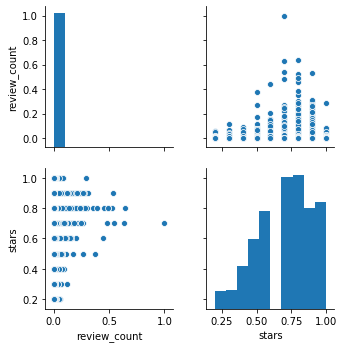

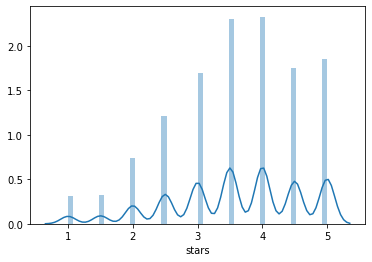

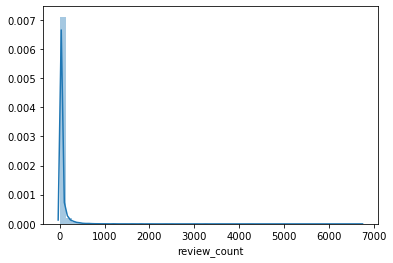

In [6]:
stars = dfBusiness.groupby('stars').mean()
stars.corr()

numeric_features = dfBusiness.loc[:, ['review_count', 'stars']]
numeric_features_standardized = (numeric_features)/numeric_features.max()
ax = sns.pairplot(numeric_features_standardized)
plt.show()

ax = sns.distplot(dfBusiness['stars'])
plt.show()
ax = sns.distplot(dfBusiness['review_count'])
plt.show()

In [7]:
#Some of the features I noticed was that the majority of businesses were getting 4 star reviews. Does the amount of reviews that a business gets affect it's overall score?

In [8]:
dfBusiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
business_id     50000 non-null object
name            50000 non-null object
city            50000 non-null object
state           50000 non-null object
stars           50000 non-null float64
categories      49883 non-null object
review_count    50000 non-null int64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.7+ MB


In [9]:
dfBusiness.info()
dfReview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
business_id     50000 non-null object
name            50000 non-null object
city            50000 non-null object
state           50000 non-null object
stars           50000 non-null float64
categories      49883 non-null object
review_count    50000 non-null int64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
business_id    50000 non-null object
user_id        50000 non-null object
stars          50000 non-null float64
text           50000 non-null object
dtypes: float64(1), object(3)
memory usage: 976.6+ KB


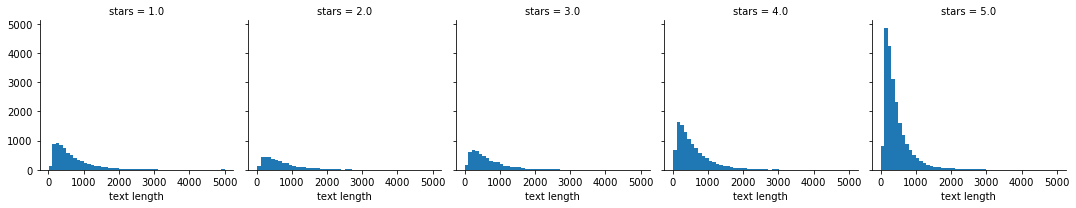

In [10]:
dfReview['text length'] = dfReview['text'].apply(len)
g = sns.FacetGrid(data=dfReview, col='stars')
g.map(plt.hist, 'text length', bins=50)

In [11]:
#The above graphs tell us that the longer the review is, the more likely that the review is going to be 5 stars

In [12]:
#Need to do more pre processing on the dataframes
dfBusiness = dfBusiness.dropna()
dfBusiness['review_count']=dfBusiness['review_count'].fillna(0)
dfBusiness['stars']=dfBusiness['stars'].fillna(0)

In [13]:
dfRev_Bus = dfBusiness.merge(dfReview, on=('business_id'), suffixes=('_bus', '_user'))
dfRev_Bus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49985 entries, 0 to 49984
Data columns (total 11 columns):
business_id     49985 non-null object
name            49985 non-null object
city            49985 non-null object
state           49985 non-null object
stars_bus       49985 non-null float64
categories      49985 non-null object
review_count    49985 non-null int64
user_id         49985 non-null object
stars_user      49985 non-null float64
text            49985 non-null object
text length     49985 non-null int64
dtypes: float64(2), int64(2), object(7)
memory usage: 3.2+ MB


In [14]:
#Now going to run multinomial to predict class based on text

In [15]:
#First we need to round the stars as the classifier doesn't handle floats very well
dfReview.stars = dfReview.stars.round()

#Determing the amount of each of the counts
dfRev_Bus["stars_bus"].value_counts()
dfRev_Bus["stars_user"].value_counts()

#Need to process the 
dfRev_Bus['review_count']=dfRev_Bus['review_count'].fillna(0)

dfRev_Bus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49985 entries, 0 to 49984
Data columns (total 11 columns):
business_id     49985 non-null object
name            49985 non-null object
city            49985 non-null object
state           49985 non-null object
stars_bus       49985 non-null float64
categories      49985 non-null object
review_count    49985 non-null int64
user_id         49985 non-null object
stars_user      49985 non-null float64
text            49985 non-null object
text length     49985 non-null int64
dtypes: float64(2), int64(2), object(7)
memory usage: 3.2+ MB


In [16]:
#Making another dataframe for just the business id, the review counts, and the text



dfBusRevText = ['review_count','text length']
dfRev_Bus[dfBusRevText] = dfRev_Bus[dfBusRevText].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

print (dfRev_Bus)

                  business_id                        name         city state  \
0      1SWheh84yJXfytovILXOAQ  Arizona Biltmore Golf Club      Phoenix    AZ   
1      QXAEGFB4oINsVuTFxEYKFQ  Emerald Chinese Restaurant  Mississauga    ON   
2      QXAEGFB4oINsVuTFxEYKFQ  Emerald Chinese Restaurant  Mississauga    ON   
3      QXAEGFB4oINsVuTFxEYKFQ  Emerald Chinese Restaurant  Mississauga    ON   
4      QXAEGFB4oINsVuTFxEYKFQ  Emerald Chinese Restaurant  Mississauga    ON   
...                       ...                         ...          ...   ...   
49980  imoyOrVqOWM6Sz-o_7HNZQ         Nellies In the Loop      Calgary    AB   
49981  3HQPK2X7Pcqte_vscDy3Ng                Fuzz Wax Bar      Toronto    ON   
49982  3HQPK2X7Pcqte_vscDy3Ng                Fuzz Wax Bar      Toronto    ON   
49983  3HQPK2X7Pcqte_vscDy3Ng                Fuzz Wax Bar      Toronto    ON   
49984  3HQPK2X7Pcqte_vscDy3Ng                Fuzz Wax Bar      Toronto    ON   

       stars_bus                       

In [17]:
dfRev_Bus = dfRev_Bus.drop(columns="city")
dfRev_Bus = dfRev_Bus.drop(columns="state")
print (dfRev_Bus)

                  business_id                        name  stars_bus  \
0      1SWheh84yJXfytovILXOAQ  Arizona Biltmore Golf Club        3.0   
1      QXAEGFB4oINsVuTFxEYKFQ  Emerald Chinese Restaurant        2.5   
2      QXAEGFB4oINsVuTFxEYKFQ  Emerald Chinese Restaurant        2.5   
3      QXAEGFB4oINsVuTFxEYKFQ  Emerald Chinese Restaurant        2.5   
4      QXAEGFB4oINsVuTFxEYKFQ  Emerald Chinese Restaurant        2.5   
...                       ...                         ...        ...   
49980  imoyOrVqOWM6Sz-o_7HNZQ         Nellies In the Loop        2.5   
49981  3HQPK2X7Pcqte_vscDy3Ng                Fuzz Wax Bar        3.0   
49982  3HQPK2X7Pcqte_vscDy3Ng                Fuzz Wax Bar        3.0   
49983  3HQPK2X7Pcqte_vscDy3Ng                Fuzz Wax Bar        3.0   
49984  3HQPK2X7Pcqte_vscDy3Ng                Fuzz Wax Bar        3.0   

                                              categories  review_count  \
0                                      Golf, Active Life     

In [18]:
#Starting to get a training data set
X = dfRev_Bus[['review_count', 'text length']]
y = dfRev_Bus[['stars_bus']]

X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49985 entries, 0 to 49984
Data columns (total 2 columns):
review_count    49985 non-null float64
text length     49985 non-null float64
dtypes: float64(2)
memory usage: 1.1 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 49985 entries, 0 to 49984
Data columns (total 1 columns):
stars_bus    49985 non-null float64
dtypes: float64(1)
memory usage: 781.0 KB


In [19]:
print(X)

       review_count  text length
0          0.000473     0.040408
1          0.029593     0.294859
2          0.029593     0.087618
3          0.029593     0.050210
4          0.029593     0.222444
...             ...          ...
49980      0.000473     0.221844
49981      0.002131     0.054611
49982      0.002131     0.130826
49983      0.002131     0.038008
49984      0.002131     0.046209

[49985 rows x 2 columns]


In [20]:
print(y)

       stars_bus
0            3.0
1            2.5
2            2.5
3            2.5
4            2.5
...          ...
49980        2.5
49981        3.0
49982        3.0
49983        3.0
49984        3.0

[49985 rows x 1 columns]


In [21]:
#This model was taken from https://github.com/AmiGandhi/Yelp-User-Rating-Prediction-using-NLP-and-Naive-Bayes-algorithm-and-Restaurant-Recommender/blob/master/User_Rating_Prediction_using_NLP_and_Restaurant_Recommendation%20-%20Copy.ipynb

from sklearn.model_selection import train_test_split

# Split X and y into X_
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.25, random_state=1)

print (trainX)

       review_count  text length
39089      0.003314     0.019004
10198      0.036222     0.301460
18194      0.218987     0.161632
18723      0.008523     0.087818
21178      0.009233     0.047810
...             ...          ...
43723      0.010180     0.169634
32511      0.079782     0.028806
5192       1.000000     0.095619
12172      0.026989     0.051810
33003      0.021544     0.360072

[37488 rows x 2 columns]


In [22]:
# This model was taken from
# https://github.com/AmiGandhi/Yelp-User-Rating-Prediction-using-NLP-and-Naive-Bayes-algorithm-and-Restaurant-Recommender/blob/master/User_Rating_Prediction_using_NLP_and_Restaurant_Recommendation%20-%20Copy.ipynb

from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(trainX, trainY)
   
intercept = regression_model.intercept_[0]
print("Expected star rating for the business using linear regression {}".format(intercept))

regression_model.score(testX, testY)

from sklearn.metrics import mean_squared_error
starPredict = regression_model.predict(testX)
regression_model_mse = mean_squared_error(starPredict, testY)
regression_model_mse

import math
math.sqrt(regression_model_mse)

Expected star rating for the business using linear regression 3.7644141700286298


0.7319906699420747

In [23]:
from nltk.corpus import wordnet
from collections import Counter
def get_pos( word ):
    w_synsets = wordnet.synsets(word)

    pos_counts = Counter()
    pos_counts["n"] = len(  [ item for item in w_synsets if item.pos()=="n"]  )
    pos_counts["v"] = len(  [ item for item in w_synsets if item.pos()=="v"]  )
    pos_counts["a"] = len(  [ item for item in w_synsets if item.pos()=="a"]  )
    pos_counts["r"] = len(  [ item for item in w_synsets if item.pos()=="r"]  )
    
    most_common_pos_list = pos_counts.most_common(4)
    return most_common_pos_list[0][0]

In [24]:
# function to perform text preprocessing on the review text
# This function was taken from https://github.com/AmiGandhi/Yelp-User-Rating-Prediction-using-NLP-and-Naive-Bayes-algorithm-and-Restaurant-Recommender/blob/master/User_Rating_Prediction_using_NLP_and_Restaurant_Recommendation%20-%20Copy.ipynb

def preprocessing(text):
    
    # tokenize into words
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]

    # lower capitalization
    tokens = [word.lower() for word in tokens]
    
    # remove stopwords
    stop = stopwords.words('english')
    tokens = [token for token in tokens if token not in stop]
    
    # remove punctuations
    tokens = [char for char in tokens if char not in string.punctuation]

    # lemmatize
    lmtzr = WordNetLemmatizer()
    tokens = [lmtzr.lemmatize(x, get_pos(x)) for x in tokens]
    #tokens = [lmtzr.lemmatize(word, pos='v') for word in tokens]
    preprocessed_text= ' '.join(tokens)

    return preprocessed_text

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=preprocessing).fit(X)

In [26]:
val = dfRev_Bus['text'].values[0]

print(preprocessing(val))

n't go expect consistent reasonable hour drive range 's clear goal owner course hammer expense without concern customer


In [27]:
X = dfRev_Bus['text']
y = dfRev_Bus['stars_user']

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=preprocessing).fit(X)

In [29]:
len(bow_transformer.vocabulary_)

720

In [30]:
X = bow_transformer.transform(X)

In [31]:
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)

# Percentage of non-zero values
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print('Density: {}'.format((density)))



Shape of Sparse Matrix:  (49985, 720)
Amount of Non-Zero occurrences:  1319264
Density: 3.6657219388038635


In [32]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)



Number transactions X_train dataset:  (34989, 720)
Number transactions y_train dataset:  (34989,)
Number transactions X_test dataset:  (14996, 720)
Number transactions y_test dataset:  (14996,)


In [33]:
# Let us now train our model using Multinomial Naive Bayes Algorithm
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [34]:
# Predict on the test set
preds = nb.predict(X_test)

In [36]:
# Performance evaluation by confusion matrix and classification report
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))
print(metrics.accuracy_score(y_test, preds))

[[ 898   41   22   98 1104]
 [ 350   33   32  118  684]
 [ 344   37   46  225  969]
 [ 409   62   59  472 2299]
 [ 693   60   50  364 5527]]


              precision    recall  f1-score   support

         1.0       0.33      0.42      0.37      2163
         2.0       0.14      0.03      0.05      1217
         3.0       0.22      0.03      0.05      1621
         4.0       0.37      0.14      0.21      3301
         5.0       0.52      0.83      0.64      6694

    accuracy                           0.47     14996
   macro avg       0.32      0.29      0.26     14996
weighted avg       0.40      0.47      0.39     14996

0.4651907175246732


In [38]:
# The code for this model was taken from
# https://github.com/AmiGandhi/Yelp-User-Rating-Prediction-using-NLP-and-Naive-Bayes-algorithm-and-Restaurant-Recommender/blob/master/User_Rating_Prediction_using_NLP_and_Restaurant_Recommendation%20-%20Copy.ipynb

#review_verdict_transformed = bow_transformer.transform([review_verdict])
#predicted_rating = nb.predict(review_verdict_transformed)[0]
#check_df = pd.DataFrame(columns=dfRev_Bus.columns)
#check_df.loc[0] = dfRev_Bus.iloc[10]
#check_df['Predicted'] = predicted_rating


review_verdict = dfRev_Bus['text'][10]
review_verdict_transformed = bow_transformer.transform([review_verdict])
predicted_rating = nb.predict(review_verdict_transformed)[0]
check_df = pd.DataFrame(columns=dfRev_Bus.columns)
check_df.loc[0] = dfRev_Bus.iloc[10]
check_df['Predicted'] = predicted_rating

print (check_df)

              business_id                        name  stars_bus  \
0  QXAEGFB4oINsVuTFxEYKFQ  Emerald Chinese Restaurant        2.5   

                                          categories  review_count  \
0  Specialty Food, Restaurants, Dim Sum, Imported...      0.029593   

                  user_id  stars_user  \
0  paYZw5wsS25IzzBZtijB8A         4.0   

                                                text  text length  Predicted  
0  Because we are in Mississauga, I think this pl...     0.081016        5.0  


In [39]:
# The code for this model was taken from
# https://github.com/AmiGandhi/Yelp-User-Rating-Prediction-using-NLP-and-Naive-Bayes-algorithm-and-Restaurant-Recommender/blob/master/User_Rating_Prediction_using_NLP_and_Restaurant_Recommendation%20-%20Copy.ipynb

review_verdict_transformed = bow_transformer.transform([review_verdict])
predicted_rating = nb.predict(review_verdict_transformed)[0]
check_df = pd.DataFrame(columns=dfRev_Bus.columns)
check_df.loc[0] = dfRev_Bus.iloc[441]
check_df['Predicted'] = predicted_rating


review_verdict = dfRev_Bus['text'][441]
review_verdict_transformed = bow_transformer.transform([review_verdict])
predicted_rating = nb.predict(review_verdict_transformed)[0]
check_df = pd.DataFrame(columns=dfRev_Bus.columns)
check_df.loc[0] = dfRev_Bus.iloc[441]
check_df['Predicted'] = predicted_rating

print (check_df)

              business_id        name  stars_bus  \
0  c35qzLN6ItDpVIoj2uQW4Q  Ravi Soups        4.5   

                      categories  review_count                 user_id  \
0  Soup, Restaurants, Sandwiches      0.077888  FiSTeBvIgxfdaur1dok4jg   

   stars_user                                               text  text length  \
0         5.0  I'm in love with Ravi stew. Chock full of vegg...     0.094619   

   Predicted  
0        5.0  


In [40]:
#Note that i was unable to determine how to change the maximum number of interations allowed
#The basis of this code was borrowed from
#https://github.com/AmiGandhi/Yelp-User-Rating-Prediction-using-NLP-and-Naive-Bayes-algorithm-and-Restaurant-Recommender/blob/master/User_Rating_Prediction_using_NLP_and_Restaurant_Recommendation%20-%20Copy.ipynb


from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=0.2, dual=False)
model = model.fit(X_train, y_train)
preds = model.predict(X_test)
acc = (preds==y_test).mean()
print(f'Accuracy: {acc}')

Accuracy: 0.48332888770338756


c:\users\ryanw\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [45]:
import itertools
import numpy as np
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

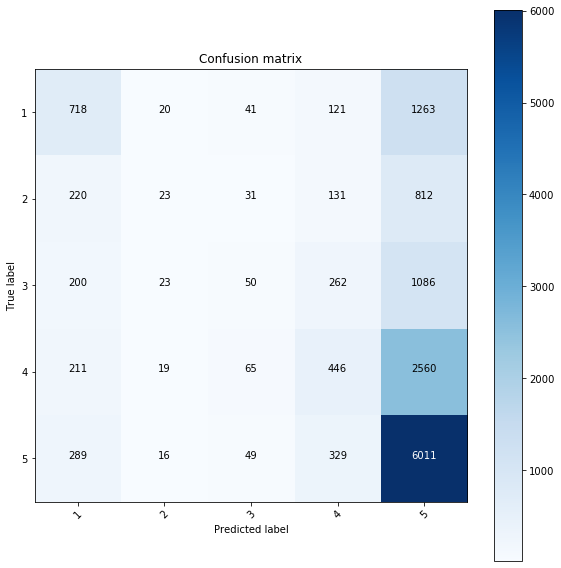

In [46]:
plot_confusion_matrix(confusion_matrix(y_test, preds.T), classes=['1', '2','3','4','5'], title='Confusion matrix')